<a href="https://colab.research.google.com/github/Pataweepr/applyML_vistec_2019/blob/master/hw2_homeDotTech_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Home dot tech 

ข้อมูลนี้เป็นข้อมูลเกี่ยวกับ ที่อยู่ในประเทศไทย 

พวกเราจะใช้ file จาก google drive ซึ่งต้องใช้ pyDrive


สามารถ อ่านการใช้งาน pydrive เบื้องต้นได้ตามนี้ 

[example pyDrive](https://github.com/Pataweepr/applyML_vistec_2019/blob/master/howToLoadDataWPyDrive.ipynb)

[link download file](https://drive.google.com/file/d/1X-cacRIF30acXyKotSmDZu5qc8Gs84Wm/view?usp=sharing)

In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



    100% |████████████████████████████████| 993kB 20.6MB/s 


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from scipy.stats import mode

you should see [example pyDrive](https://colab.research.google.com/drive/1pIl9zCObPc_8BLivb7FRsjYBhKGWK9eL) because each folder_id is difference.

###FILE_ID!!!

<pre>   
title: userLog_201801_201802_for_participants.csv, id: 19sNUEOYeqU33EWBMRKq65YydpgLQoppZ
title: project_main.csv, id: 1iRz0edC_tjIk0Ge33fKLZYN1ciXxup-0
title: project_facility.csv, id: 13jUinwDsk9sYvoMOBaTMfTM11912CvdO
</pre>


we use "delimiter= ';' " to split colums

In [0]:
def readDataFromDrive_HDT_single_col(file_id):
  # file_id is str
  data_downloaded = drive.CreateFile({'id': file_id })
  data_downloaded.GetContentFile('readCsvFile.csv')
  # raw_data = pd.read_csv('readCsvFile.csv')
  raw_data = pd.read_csv('readCsvFile.csv',delimiter= ';')

  print('#########################################################################################################################')
  return raw_data;
  
def readDataFromDrive_HDT(file_id):
  # file_id is str
  data_downloaded = drive.CreateFile({'id': file_id })
  data_downloaded.GetContentFile('readCsvFile.csv')
  raw_data = pd.read_csv('readCsvFile.csv')
  print(raw_data.dtypes)
  print('-------------- NA DATA ------------------')
  for name_col in raw_data.columns:
    print(name_col,'null :',raw_data[name_col].isnull().values.any())
  print('#########################################################################################################################')
  return raw_data;

filesthat we use in this exercise

* userLog
* project_main
* project_facility


userLog :  มันการเป็นเก็บ log ของ user ทั้งหมดที่เข้ามาในระบบ ว่า user เข้าผ่านอุปกรณื อะไรบ้างแล้วเข้าไปดูโปรเจคไหน

project_main เป็นการบอกรายละเอียดแต่ละ project ว่ามีข้อมูลอะไรบ้าง เกี่ยวกับตำแหน่ง หรือ ตัวของ ราคา

project_facility บอก facility ของแต่ละโปรคเจคว่าเป็นอย่างไร





# TODO#1: เปลี่ยนข้อมูลเป็นตัวเลข

ข้อมูบบที่เราจะพิจารณาต่อไปนี้เป็นข้อมูล

In [0]:
################################## #############################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################

project_main
#########################################################################################################################
(1775, 18)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,project_id,developer_id,brand_id,project_name_th,project_name_en,district_id,province_id,lat,lon,project_land_size_rai,total_unit,percent_car_parking,starting_price,highest_price,project_status,created_at
0,44,140786,0.0,พาร์ควิลล์ 3,Parkville 3,1046.0,10,13.891719,100.722099,54,NaN,NaN,3500000.0,3862000.0,1.0,2011-01-14T18:40:12.117+0700
1,24,1032,0.0,สัมมากร นิมิตใหม่,Sammakorn Nimitmai,1046.0,10,13.876590,100.731927,154,NaN,NaN,4590000.0,NaN,0.0,2011-02-24T21:43:59.297+0700
7,208,13323,NaN,ลิฟวิ่งนารา รามคำแหง-สุวรรณภูมิ,LIVING NARA RAMKHAMHAENG-SUVARNABHUMI,1011.0,10,13.769810,100.722040,44,201.0,NaN,3500000.0,7600000.0,0.0,2010-07-02T07:00:00.000+0700
8,228,6772,0.0,เค.ซี.รามอินทรา 5 (พระยาสุเรนทร์),K.C. RAMINTRA 5,1046.0,10,13.862623,100.695135,34,NaN,NaN,1810000.0,NaN,0.0,2010-12-16T18:51:42.173+0700
11,982,12136,979.0,อนาวิลล์ สุวรรณภูมิ,Anaville Suvarnabhumi,1011.0,10,13.763348,100.803434,131,NaN,NaN,4300000.0,NaN,1.0,2011-01-17T22:55:47.317+0700


<details>
    <summary>SOLUTION HERE!</summary>
      <pre>
        <code>
print('project_main')
project_main = readDataFromDrive_HDT_single_col('1iRz0edC_tjIk0Ge33fKLZYN1ciXxup-0')  
project_main = project_main.loc[project_main['province_id'] == 10]
print(project_main.shape)
project_main = project_main.drop(columns=['project_land_size_ngan', 'project_land_size_wa'])
project_main.loc[project_main["project_status"] == "A", "project_status"] = 1
project_main.loc[project_main["project_status"] == "U", "project_status"] = 0
project_main = project_main.convert_objects(convert_numeric=True)
project_main.head()
        </code>
      </pre>
</details>

# TODO#2: แก้ไขข้อมูล data frame ของ projet_main ให้ไม่มี NAN

In [0]:
################################## #############################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################

<details>
    <summary>SOLUTION HERE!</summary>
      <pre>
        <code>
project_main = project_main.dropna(subset=['lat'])
project_main["starting_price"] = project_main["starting_price"].fillna(project_main["starting_price"].mode().iloc[0])
        </code>
      </pre>
</details>

## TODO#3: load ข้อมูล facility
ลอง print ข้อมูลดูเราจะเห็นว่าข้อมูล และอธิบายว่าเหมาะสมกับการใช้หรือไม่


In [0]:
# project_facility  
project_facility = readDataFromDrive_HDT_single_col('13jUinwDsk9sYvoMOBaTMfTM11912CvdO')
project_facility.head()

#########################################################################################################################


,project_id,facility_id
0,4,1
1,4,3
2,4,4
3,4,5
4,45,2



## TODO#4: แปลงข้อมูล fac ให้เหมาะแก้การใช้งาน 
เนื่องจากข้อมูลไม่ได้เป็นรูปแบบของตารางที่ใช้ได้ง่าย [pd.crosstab](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.crosstab.html) เพราะ เราต้องการตารางที่บอกถึง facility ว่ามีหรือไม่ในทุกแบบของ facility

In [0]:
################################## #############################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################

Int64Index([   4,   24,   29,   41,   44,   45,   73,   95,  115,  133,
            ...
            9522, 9524, 9525, 9526, 9527, 9531, 9532, 9534, 9536, 9541],
           dtype='int64', name='project_id', length=5039)


facility_id,1,2,3,4,5,6
project_id,,,,,,
4,1,0,1,1,1,0
24,0,0,1,1,0,1
29,0,0,0,0,1,0
41,1,1,0,1,0,1
44,1,0,1,0,0,0


<details>
    <summary>SOLUTION HERE!</summary>
      <pre>
        <code>
project_facility_table = pd.crosstab(project_facility['project_id'], project_facility['facility_id'], rownames=['project_id'], colnames=['facility_id'])
print(project_facility_table.index)
project_facility_table.head()
        </code>
      </pre>
</details>

## TODO#5: กำจัดข้อมูลที่ใช้ไม่ได้ ออกไป เลือกใช้แต่ข้อมูลที่ครบ

เราจำเป็นต้องแยกข้อมูลให้เหลือ project ที่มีข้อมูลครบ เท่านั้น  เราสามารถใช้ [pandas.DataFrame.isin](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html) เพื่อช่วยในการหา วา่มีข้อมูลร่วมกันได้ในการแยกข้แมูลออกมา

In [0]:
################################## #############################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################

(1697, 6)
(1697, 16)


facility_id,1,2,3,4,5,6
project_id,,,,,,
24,0,0,1,1,0,1
44,1,0,1,0,0,0
45,0,1,1,1,1,0
95,1,0,0,0,0,0
133,1,0,1,0,1,0


<details>
    <summary>SOLUTION HERE!</summary>
      <pre>
        <code>
project_facility_table = project_facility_table.loc[project_facility_table.index.isin(project_main['project_id'])]
project_main = project_main.loc[project_main['project_id'].isin(project_facility_table.index.astype(int))]
project_main = project_main.sort_values('project_id')
print(project_facility_table.shape)
print(project_main.shape)
project_facility_table.head()
        </code>
      </pre>
</details>

In [0]:
project_main.head()

,project_id,developer_id,brand_id,project_name_th,project_name_en,district_id,province_id,lat,lon,project_land_size_rai,total_unit,percent_car_parking,starting_price,highest_price,project_status,created_at
1,24,1032,0.0,สัมมากร นิมิตใหม่,Sammakorn Nimitmai,1046.0,10,13.876590,100.731927,154,NaN,NaN,4590000.0,NaN,0.0,2011-02-24T21:43:59.297+0700
0,44,140786,0.0,พาร์ควิลล์ 3,Parkville 3,1046.0,10,13.891719,100.722099,54,NaN,NaN,3500000.0,3862000.0,1.0,2011-01-14T18:40:12.117+0700
164,45,2840,0.0,พาร์คเวย์ ชาเล่ต์,parkway chalet,1010.0,10,13.803465,100.727406,87,NaN,NaN,5500000.0,NaN,0.0,2011-03-28T23:27:08.833+0700
172,95,2730,NaN,อารีน่า พาร์ค ชวนชื่น ซิตี้,NaN,1005.0,10,13.859276,100.665287,79,NaN,NaN,2000000.0,5000000.0,0.0,2007-04-18T23:02:22.000+0700
185,133,6772,538.0,เค.ซี.เลควิว,K.C. LAKEVIEW,1044.0,10,13.759440,100.679230,60,NaN,NaN,11000000.0,NaN,1.0,2011-01-14T18:42:51.630+0700


## TODO#6: ลองดูข้อมูล จาก user log 



ลอง check ข้อมูลของ log data 

In [0]:
# care values province_id
# we use only bangkok  province_id = 10 
### load data ###############################################################################
print('userLog')
userLog = readDataFromDrive_HDT_single_col('19sNUEOYeqU33EWBMRKq65YydpgLQoppZ') 
userLog.head()


userLog
#########################################################################################################################


,userCode,project_id,requestedDevice,userAgent,pageReferrer,year,month,day,hour
0,7717bdc2-ea3e-e8ad-5d6b-178bd71c38b2,7956,Mobile,Android,HomeWebsite,2018,1,1,0
1,7717bdc2-ea3e-e8ad-5d6b-178bd71c38b2,7956,Mobile,Android,HomeWebsite,2018,1,1,0
2,cb5b4b68-cc01-6db6-f54b-4a0f881301c5,5067,Mobile,iPhone,HomeWebsite,2018,1,1,0
3,5f74cef2-0d1e-b619-3564-0955a14e0985,6654,Mobile,iPhone,Google,2018,1,1,0
4,dba8f279-844e-eef6-73ac-22bd7d1353cc,6474,Mobile,iPad,Google,2018,1,1,0


In [0]:
print(userLog.shape)


(1234579, 9)


In [0]:

################################## #############################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
# print(userLog.loc[userLog['project_id'].isin(project_facility_table.index.astype(int))].shape)
userLog = userLog.loc[userLog['project_id'].isin(project_facility_table.index.astype(int))]

(405448, 9)


## TODO#7: ข้อมูล histrogram ของตัว user และ project ที่ user ดู

จง check ดูความบ่อยของการใช้ user และ plot histogram ออกมา 
เราสามารถใช้ [pd.value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) เพื่อช่วยการนับจำนวนได้

(175127,)


de89bac5-57c6-ecfb-184d-cc4e973c31ac    7408
31bb9bf0-8ad5-3e50-f334-e6c7de89bac5    3465
eec0a125-d5ab-f692-c501-4713c35c756d     703
e400406a-b73d-3e78-d37d-53fcddebccaf     518
1aecd8e5-f02b-ba5c-e865-49da43ad8f22     472
Name: userCode, dtype: int64

<pre>
<code>
userLog_freq_user = userLog['userCode'].value_counts()
userLog_freq_user_np  = np.array(userLog_freq_user.values)
userLog_freq_proj = userLog['project_id'].value_counts()
userLog_freq_proj_np = np.array(userLog_freq_proj.values)
print(userLog_freq_user_np.shape)
userLog_freq_user.head()
</code>
</pre>



จงแสดง histogram ของความถี่ของ user และ ใช้ pd.head() เพื่อดูค่าช่วงต้นๆ ของ histogram

(1685,)


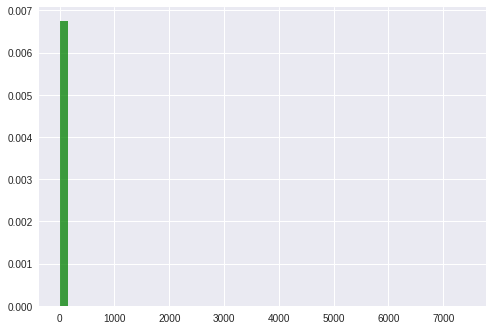

## TODO#8: จงหาค่า medium และ mode ของ ความถี่ในการเข้าใช้ ของ user
จากค่าที่พิจารณา  จงหา mode medium percentile ที่ 95 [np.percentile](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.percentile.html)

In [0]:
print(mode(userLog_freq_user_np))
print(np.percentile(userLog_freq_user_np, 95))
#print('++++++++++++++++++++++++++++++++++++++++++')

ModeResult(mode=array([1]), count=array([110653]))
7.0


## TODO#9: 

จากกราฟ histogram ที่ได้ละ ค่า mode medium และ ค่าสูงสุดที่ user ใช้ จงบอกปัญหาของข้อมูล ของ userlog ว่าเกิดอะไรขึ้น

เขียนคำตอบ :

## TODO#10: 

จะสังเกตว่าค่า ของ histogram user นั้นมี user ประหลาดอยู่ดังนั้น เราจะกำลังข้อมูลที่ไม่ดีออกไป โดยการตัด เปอร์เซ็นไทน์ 90 ของการใช้ของ user

ใช้ [pd.index](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Index.html) ในการดึงค่า index ของข้อมูลออกมา เพื่อช่วยในการจัดการข้อมูลได้




In [0]:
#print(np.percentile(userLog_freq_user_np, 95))
userLog_freq_user = userLog_freq_user.loc[userLog_freq_user <= 3000 ]
userLog_freq_user_np = np.array(userLog_freq_user.values)
# we use only top 50000 user
top_user_per = 100 -(50000*100)/userLog_freq_user.shape[0]
normal_user = userLog_freq_user.loc[userLog_freq_user >= top_user_per].index
print(normal_user.shape)
userLog = userLog.loc[userLog['userCode'].isin(normal_user)]
userLog.shape

(77,)


(12122, 9)

clear to top project

"\n# we use only 1000 project to compute fast\ntop_percentile = 100 - (1000*100/userLog_freq_proj.shape[0])\nprint(top_percentile)\nprint(np.percentile(userLog_freq_proj_np, top_percentile))\nproj_top = userLog_freq_proj.loc[ userLog_freq_proj >= np.percentile(userLog_freq_proj_np, top_percentile) ].index\nprint(proj_top.shape)\n\n# print(proj_top)\nuserLog = userLog.loc[userLog['project_id'].isin(proj_top)]\nprint(userLog.shape)\nuserLog.head()\n"

In [0]:
## clear data 

#project_facility_table = project_facility_table.loc[project_facility_table.index.isin(proj_top)]
#project_main = project_main.loc[project_main['project_id'].isin(proj_top)]

#print(project_facility_table.shape)
#print(project_main.shape)

เนื่องจาก ข้อมูล มีจำนวนมาก เราจะเลือกแค่ project ที่คนเข้ามาดูมากที่สุด top 1000 project มาคิดเท่านั้น

#optional 

พวกเราสามารถ filter ข้อมูลด้วยตำนวนครั้งที่เปิดขึ้นมาดูได้หรือไม่

------

## TODO#11:

เราจะสร้าง recommendation system โดยจะแบ่งข้อมูลจาก 

In [0]:
#userLog.head()
userLog_freq_day = pd.crosstab(userLog['userCode'], [userLog['year'], userLog['month'], userLog['day']], rownames =['userCode'], colnames=['year','month','day'])
userLog_last_week  = userLog.loc[userLog['month'] == 2]
userLog_last_week = userLog_last_week.loc[ userLog_last_week['day'] >=16]
print(userLog_last_week.shape)
print(userLog.shape)

userLog_last_week.head()


(2144, 9)
(12122, 9)


,userCode,project_id,requestedDevice,userAgent,pageReferrer,year,month,day,hour
1056813,bef05607-6730-a597-ca83-89c4ae684a90,8499,Desktop,Windows,HomeWebsite,2018,2,16,8
1056817,bef05607-6730-a597-ca83-89c4ae684a90,8499,Desktop,Windows,HomeWebsite,2018,2,16,8
1056908,bef05607-6730-a597-ca83-89c4ae684a90,4614,Desktop,Windows,HomeWebsite,2018,2,16,8
1056910,bef05607-6730-a597-ca83-89c4ae684a90,4614,Desktop,Windows,HomeWebsite,2018,2,16,8
1056963,bef05607-6730-a597-ca83-89c4ae684a90,4017,Desktop,Windows,HomeWebsite,2018,2,16,8


In [0]:
userLog_freq_day.head()

year                                 2018                            ...     \
month                                   1                            ...  2   
day                                    1  2  3  4  5  6  7  8  9  10 ... 13   
userCode                                                             ...      
02e5a154-8e62-a827-db93-bf15c35da2a5    0  0  0  0  0  0  0  0  0  0 ...  0   
0b131e91-ba50-cf0a-f148-7082c6a6852a    0  0  0  0  0  0  0  0  0  0 ...  0   
0fb6c4c9-da0f-4522-6694-e62ac5134d91    0  0  0  0  0  0  0  0  0  0 ...  0   
16daeb2a-9ec1-76a3-f1fd-c1751a772519    0  0  0  0  0  0  0  0  0  0 ...  0   
1aecd8e5-f02b-ba5c-e865-49da43ad8f22    0  0  0  0  0  0  0  0  0  0 ...  4   

year                                                                     
month                                                                    
day                                  14   15  16  17 18  19   20  21 22  
userCode                                                                 
02e5a154-8e62-a827-db93-bf15c35da2a5  0    0   0   0  0   0    0   0  0  
0b131e91-ba50-cf0a-f148-7082c6a6852a  0    6   3   0  0   0    0   0  0  
0fb6c4c9-da0f-4522-6694-e62ac5134d91  0  235   0   0  0   0    0   0  0  
16daeb2a-9ec1-76a3-f1fd-c1751a772519  0    0   0  13  0   0    0   0  0  
1aecd8e5-f02b-ba5c-e865-49da43ad8f22  9  110  47   0  0  40  209  53  0  

[5 rows x 53 columns]

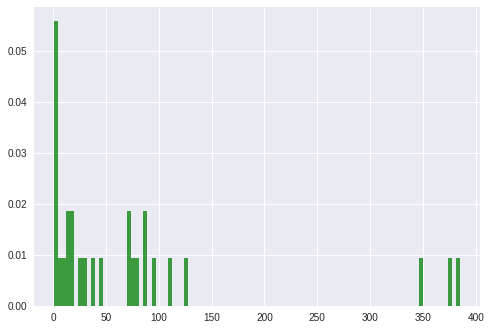

(28,)


In [0]:
user_freq_last_week = userLog_last_week['userCode'].value_counts()
user_freq_last_week_np = np.array(user_freq_last_week.values)

n, bins, patches = plt.hist(user_freq_last_week_np, 100, density=True, facecolor='g', alpha=0.75)
plt.show()

print(user_freq_last_week.shape)


In [0]:
print(user_freq_last_week.index.shape)


(28,)


------

# split train and test set

พวก เราจะใช้ user ที่มาใช้ในสัปดาห์สุดท้ายเป็น test set

ที่เหลือ เป็น train set

In [0]:
userLog_train = userLog.loc[~userLog.index.isin(userLog_last_week.index)]
userLog_test = userLog.loc[userLog.index.isin(userLog_last_week.index)]

print(userLog_last_week.index)
print(userLog_train.shape)
print(userLog_test.shape)
print(userLog.shape)

Int64Index([1056813, 1056817, 1056908, 1056910, 1056963, 1056967, 1056975,
            1056977, 1056980, 1057010,
            ...
            1229202, 1229227, 1229351, 1229364, 1229372, 1229447, 1229449,
            1229450, 1229457, 1229463],
           dtype='int64', length=2144)
(9978, 9)
(2144, 9)
(12122, 9)


In [0]:

print(userLog_train.shape)
print(userLog_test.shape)


(9978, 9)
(2144, 9)


In [0]:
freq_user_seen_proj_train = pd.crosstab(userLog_train['userCode'], userLog_train['project_id'], rownames=['userCode'], colnames=['project_id'])
freq_user_seen_proj_train_np = np.array(freq_user_seen_proj_train.values)
#print(freq_user_seen_proj_train_np)
print(freq_user_seen_proj_train_np.shape)

freq_user_seen_proj_train.head()

(67, 1371)


project_id,24,44,45,133,156,189,208,228,234,235,...,9395,9402,9403,9414,9418,9419,9420,9422,9424,9446
userCode,,,,,,,,,,,,,,,,,,,,,
02e5a154-8e62-a827-db93-bf15c35da2a5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0b131e91-ba50-cf0a-f148-7082c6a6852a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0fb6c4c9-da0f-4522-6694-e62ac5134d91,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16daeb2a-9ec1-76a3-f1fd-c1751a772519,0,1,0,0,0,0,0,0,2,1,...,0,0,0,0,0,0,0,0,0,0
1aecd8e5-f02b-ba5c-e865-49da43ad8f22,0,5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
freq_user_seen_proj_test = pd.crosstab(userLog_test['userCode'], userLog_test['project_id'], rownames=['userCode'], colnames=['project_id'])
freq_user_seen_proj_test_np = np.array(freq_user_seen_proj_test.values)
#print(freq_user_seen_proj_test_np)
print(freq_user_seen_proj_test_np.shape)

freq_user_seen_proj_test.head()

(28, 823)


project_id,24,44,234,287,291,384,404,618,836,908,...,9389,9395,9422,9446,9471,9478,9483,9484,9491,9493
userCode,,,,,,,,,,,,,,,,,,,,,
0b131e91-ba50-cf0a-f148-7082c6a6852a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16daeb2a-9ec1-76a3-f1fd-c1751a772519,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1aecd8e5-f02b-ba5c-e865-49da43ad8f22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20e4c3dd-fee3-5c3f-ca29-fc316d7304c1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
240428e0-356d-1674-8098-c6182ee42b02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


----


# TODO#11:  function to normalize data


In [0]:
def normalize(x):
  x_min = np.min(x,axis = 0)
  x_max = np.max(x,axis = 0)
  x_nor = (x - x_min)/ (x_max - x_min)
  return x_nor;

# recommendation system
พวกเราจะสร้าง recomentation sys โดยเราจะใช้ NNในการสร้างขึ้นมา

[Nearest Neighbors example](https://scikit-learn.org/stable/modules/neighbors.html)


[distance function](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric)

In [0]:
# recommentdation system
def feature_sel(userLog_data_frame,user_code):
  np_data = np.zeros((user_code.shape[0], 3 + project_facility_table.shape[1]))
  
  for i in np.arange(user_code.shape[0]):
    user_sel = user_code[i]
    #print(user_sel)
    userLog_dataF_sel = userLog_data_frame.loc[userLog_data_frame['userCode'] == user_sel]
    proj_id_sel = userLog_dataF_sel['project_id'].values
    input_np_data = np.zeros((proj_id_sel.shape[0],3 + project_facility_table.shape[1]))
    # print(proj_id_sel)
    for j in np.arange(proj_id_sel.shape[0]):
      user_proj_far = project_facility_table.loc[project_facility_table.index == proj_id_sel[j]]
      user_proj_main = project_main.loc[project_main['project_id'] == proj_id_sel[j]]
      input_np_data[j,:] = np.hstack(( np.array(user_proj_main[["lat","lon","starting_price"]].values) ,  np.array(user_proj_far.values) ))
  np_data[i,:] = np.mean(input_np_data,axis=0)
  return np_data;


# TODO#11: 

run example จาก feature ที่เรากำหนด ขึ้นจากหัวข้อด้านบน



In [0]:
project_main_np_data_nor = feature_sel(userLog_train,freq_user_seen_proj_train.index)
project_main_np_data_nor = normalize(project_main_np_data_nor)
print(project_main_np_data_nor.shape)



(67, 9)


In [0]:

nbrs_proj = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(project_main_np_data_nor) # metric=’minkowski’ , “jaccard”  ## jaccard use boolean
# print(project_main_np_data_nor)

distances, indices = nbrs_proj.kneighbors(project_main_np_data_nor)



ลองสรา้ง  recommendation system จาก การดูของ user ว่า ใกล้เคียง กับ user คนไหนบ้าง และ recommend ตาม porj ที่ไม่ได้ดู

แต่การสร้าง user ขึ้นมา ข้อมูลที่มีนั้นใหญ่เกินไปที่เราจะประมวลผลได้ ดังนั้น เราต้องเลือก user มา top 1000 มาเป็น exaple ที่เลือก recommend

In [0]:
freq_user_seen_proj_train_nor = normalize(freq_user_seen_proj_train_np) 

In [0]:
nbrs_user_numberical = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(freq_user_seen_proj_train_nor) # metric=’minkowski’ , “jaccard”  ## jaccard use boolean

distances, indices = nbrs_user_numberical.kneighbors(freq_user_seen_proj_train_nor)

ลองสุ่มตัวอย่างเพื่อทดสอบผลลัพธ์

In [0]:
nbrs_user = NearestNeighbors(n_neighbors= 6 , algorithm='auto',metric='jaccard' ).fit(freq_user_seen_proj_train_np >= 1)
print(freq_user_seen_proj_train_np.shape)

(67, 1371)


In [0]:
distances, indices = nbrs_user.kneighbors(freq_user_seen_proj_train_np >= 1)
print('index')
#print(indices[0:20])
print(indices.shape)
#print(distances[0:20])
#print('----------------------------------------------------')

index
(67, 6)


แสดงผลการ recommendation โดยดูจากผลลัพธ์ว่าใกล้เคียงอย่างไรบ้าง

In [0]:
freq_user_seen_proj_all = pd.crosstab(userLog['userCode'], userLog['project_id'], rownames=['userCode'], colnames=['project_id'])
print(freq_user_seen_proj_all.shape)
num_rand =np.random.randint(22185,  size=1)
#print(num_rand)
#user_0_seen = freq_user_seen_proj_all.iloc[10000].values

# print(user_0_seen > 0)
#print('difgkdpfgodfkgdfjgoidjfgoidfgjo')
#print(freq_user_seen_proj_all.columns[user_0_seen > 0].values)

# print(freq_user_seen_proj_all[1905].head(1))

#print('------------------------------------------------------')
#print(freq_user_seen_proj_all.loc['0009ecb5-23d3-d9d5-16fd-6d9b39465d87'])

(77, 1480)


ในการ recommendation จริงๆนั้นมีการ วัดผลการ recommend โดยใช้รูปแบบนี้เป็นหลักลองแสดงการวัดผลโดยใช้ matrix นี่ดู [Mean Average Precision](http://sdsawtelle.github.io/blog/output/mean-average-precision-MAP-for-recommender-systems.html?fbclid=IwAR2UOfz0a_2Ig60aQ2HszgZq63nch96Hbzod2q54kDZRZT_mPzdsxJXyPj0)

# evaluation 

function เพื่อ run map @ k

In [0]:
def proj_recommend(nn_dict,dict_seen_train):
  nn_proj = {}
  for user_code_nn in nn_dict:
    list_proj = []
    for user_in_list in nn_dict[user_code_nn]:
      list_proj = list_proj + list(dict_seen_train[user_in_list])
    nn_proj[user_code_nn] = list_proj
  return nn_proj

####################################################################

def index_to_usercode(nn_index,user_code_list):
  nn_dict = {}
  for i in np.arange(nn_index.shape[0]):
    nn_list = []
    nn_name = user_code_list[i]
    for j in np.arange(nn_index.shape[1]):
      nn_list.append(user_code_list[j])
    nn_dict[nn_name] = nn_list
  return nn_dict

####################################################################

def proj_repeat(dict_train,dict_test):
  dict_out = {} 
  for user_code in dict_test:
    if user_code in dict_train:
      list_proj_train = np.array(dict_train[user_code])
      list_proj_test = np.array(dict_test[user_code])
      bool_list = np.isin(list_proj_test ,list_proj_train)
      dict_out[user_code] = list(list_proj_test[bool_list])
  return dict_out

####################################################################

def proj_seen(data_freq_seen):
  all_colums = data_freq_seen.columns
  all_index = data_freq_seen.index
  output_list = {}
  for index in np.arange(len(all_index)):
    np_array = np.array(data_freq_seen.iloc[index])
    output_list[all_index[index]] = all_colums[np_array > 0].values
  return output_list

####################################################################

def mean_average_precision(dict_recomment,dict_test,k):
  list_map_at_k = []
  for user_code in dict_test:
    list_map_at_k_user_i = []
    list_proj_rec = np.array(dict_recomment[user_code])
    list_proj_test = np.array(dict_test[user_code])
    
    ##########
    
    for i in np.arange(k):
      if(i == len(list_proj_rec) or len(list_proj_test) == 0 or len(list_proj_rec) == 0):
        break
      bool_list = np.isin(list_proj_rec[0:i+1],list_proj_test)
      list_map_at_k_user_i.append(np.sum(bool_list)/(i+1))
    
    ##########

    number = np.mean(np.array(list_map_at_k_user_i))
    
    if(~np.isnan(number)):
      list_map_at_k.append(number)

  return np.mean(np.array(list_map_at_k))

# ตรวจดูคำตอบ NN

In [0]:
dist_user_test = proj_seen(freq_user_seen_proj_test)
dist_user_train = proj_seen(freq_user_seen_proj_train)
dist_user_test = proj_repeat(dist_user_train,dist_user_test)
nn_dict_rec = index_to_usercode(indices,freq_user_seen_proj_train.index)
dist_user_rec = proj_recommend(nn_dict_rec,dist_user_train)
dist_user_rec = proj_repeat(dist_user_train,dist_user_rec)

In [0]:
k = 3
map_k = mean_average_precision(dist_user_rec,dist_user_test,k)
print('Your result : ', map_k)

Your result :  0.1273148148148148


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


------
------
-----------
-----------

<pre>
title: testing_df_allprj_kaggle.csv, id: 13ZtVjUZJ_qs4fpLqDPSZhKwCc7pSKin_
title: knn_submit_file.csv, id: 1QcrlPjw3qiN8U8nmUcAOY_PnKmIThNqs
</pre>

In [0]:
'''
  # file_id is str
  data_downloaded = drive.CreateFile({'id': file_id })
  data_downloaded.GetContentFile('readCsvFile.csv')
  # raw_data = pd.read_csv('readCsvFile.csv')
  raw_data = pd.read_csv('readCsvFile.csv',delimiter= ';')
'''
data_downloaded = drive.CreateFile({'id': '13ZtVjUZJ_qs4fpLqDPSZhKwCc7pSKin_' })
data_downloaded.GetContentFile('readCsvFile.csv')
testing_df_allprj_kaggle = pd.read_csv('readCsvFile.csv')
testing_df_allprj_kaggle.head()



,userCode,project_id
0,003366c6-0cd9-48e7-d134-2051d7360c2d,6802 6714
1,003b2f18-60b4-37be-c63d-0caead1afa97,7826
2,003d571e-9de7-6de3-2cb6-2ae190cc7beb,6608
3,00426ede-6813-949b-de2e-6d8b228dff1d,4370
4,0043a9c7-cace-1aa1-3188-4b173bf28991,8615


In [0]:
data_downloaded = drive.CreateFile({'id': '1QcrlPjw3qiN8U8nmUcAOY_PnKmIThNqs' })
data_downloaded.GetContentFile('readCsvFile2.csv')
knn_submit_file = pd.read_csv('readCsvFile2.csv')

print(knn_submit_file['project_id'].iloc[0].split(' '))
print(knn_submit_file['userCode'].iloc[0])
print(knn_submit_file.shape)
knn_submit_file.head()

['6734', '6654', '6802', '6702', '6714', '8354', '5979']
003366c6-0cd9-48e7-d134-2051d7360c2d
(7408, 2)


,userCode,project_id
0,003366c6-0cd9-48e7-d134-2051d7360c2d,6734 6654 6802 6702 6714 8354 5979
1,003b2f18-60b4-37be-c63d-0caead1afa97,6585 6449 8456 9007 964 287 7475
2,003d571e-9de7-6de3-2cb6-2ae190cc7beb,3715 8908 8155 2449 8017 5540 8618
3,00426ede-6813-949b-de2e-6d8b228dff1d,4787 8888 4381 8202 5663 8907 3321
4,0043a9c7-cace-1aa1-3188-4b173bf28991,5392 9109 7190 8549 5655 3268 9413


In [0]:
def read_dict_ref(data_frame):
  dict_data = {}
  for i in np.arange(data_frame.shape[0]):
    dict_data[data_frame['userCode'].iloc[i]] = data_frame['project_id'].iloc[i].split(' ')
  return dict_data

In [0]:
dict_rec = read_dict_ref(knn_submit_file)
dict_test = read_dict_ref(testing_df_allprj_kaggle)

k = 3
map_k = mean_average_precision(dict_rec,dict_test,k)

print(map_k)

0.028220242380609547
